In [1]:
def get_metrics(input_file):
#     print("input file: ", input_file)
    f = open(input_file,"r")
    fl = f.readlines()
    f.close()

    count = 1
    metrics = []
    file_name = input_file.split(".")[0]
    split_title = file_name.split("_")
    metrics.extend([float(split_title[3])])
    for line in fl:
    #     print(line)
        if count >= 32 and count < 37:
            _, val_str = line.split(":") 
            if defocus.match(line):
                val=float(val_str.split(",")[0])
                metrics.append(val)
    #             print(val)
            if score.match(line):
                val=float(val_str)
                metrics.append(val)
    #             print(val)
            if thon_rings.match(line):
                val=float(val_str.split("Angstroms")[0])
                metrics.append(val)
    #             print(val)
        count+=1
    all_metrics[split_title[0]].append(metrics)

In [2]:
import sys
import re
import os
from collections import defaultdict
import glob
import matplotlib.pyplot as plt
import numpy as np

defocus = re.compile(r"Estimated defocus values[ ]+: [-+]?[0-9]*\.?[0-9]+ , [-+]?[0-9]*\.?[0-9]+ Angstroms")
score = re.compile(r"Score[ ]+: [-+]?[0-9]*\.?[0-9]+")
thon_rings = re.compile(r"Thon rings with good fit up to[ ]+: [-+]?[0-9]*\.?[0-9]+ Angstroms")

all_metrics = defaultdict(list)
for f in glob.glob('*summary*.txt'):
    get_metrics(f)

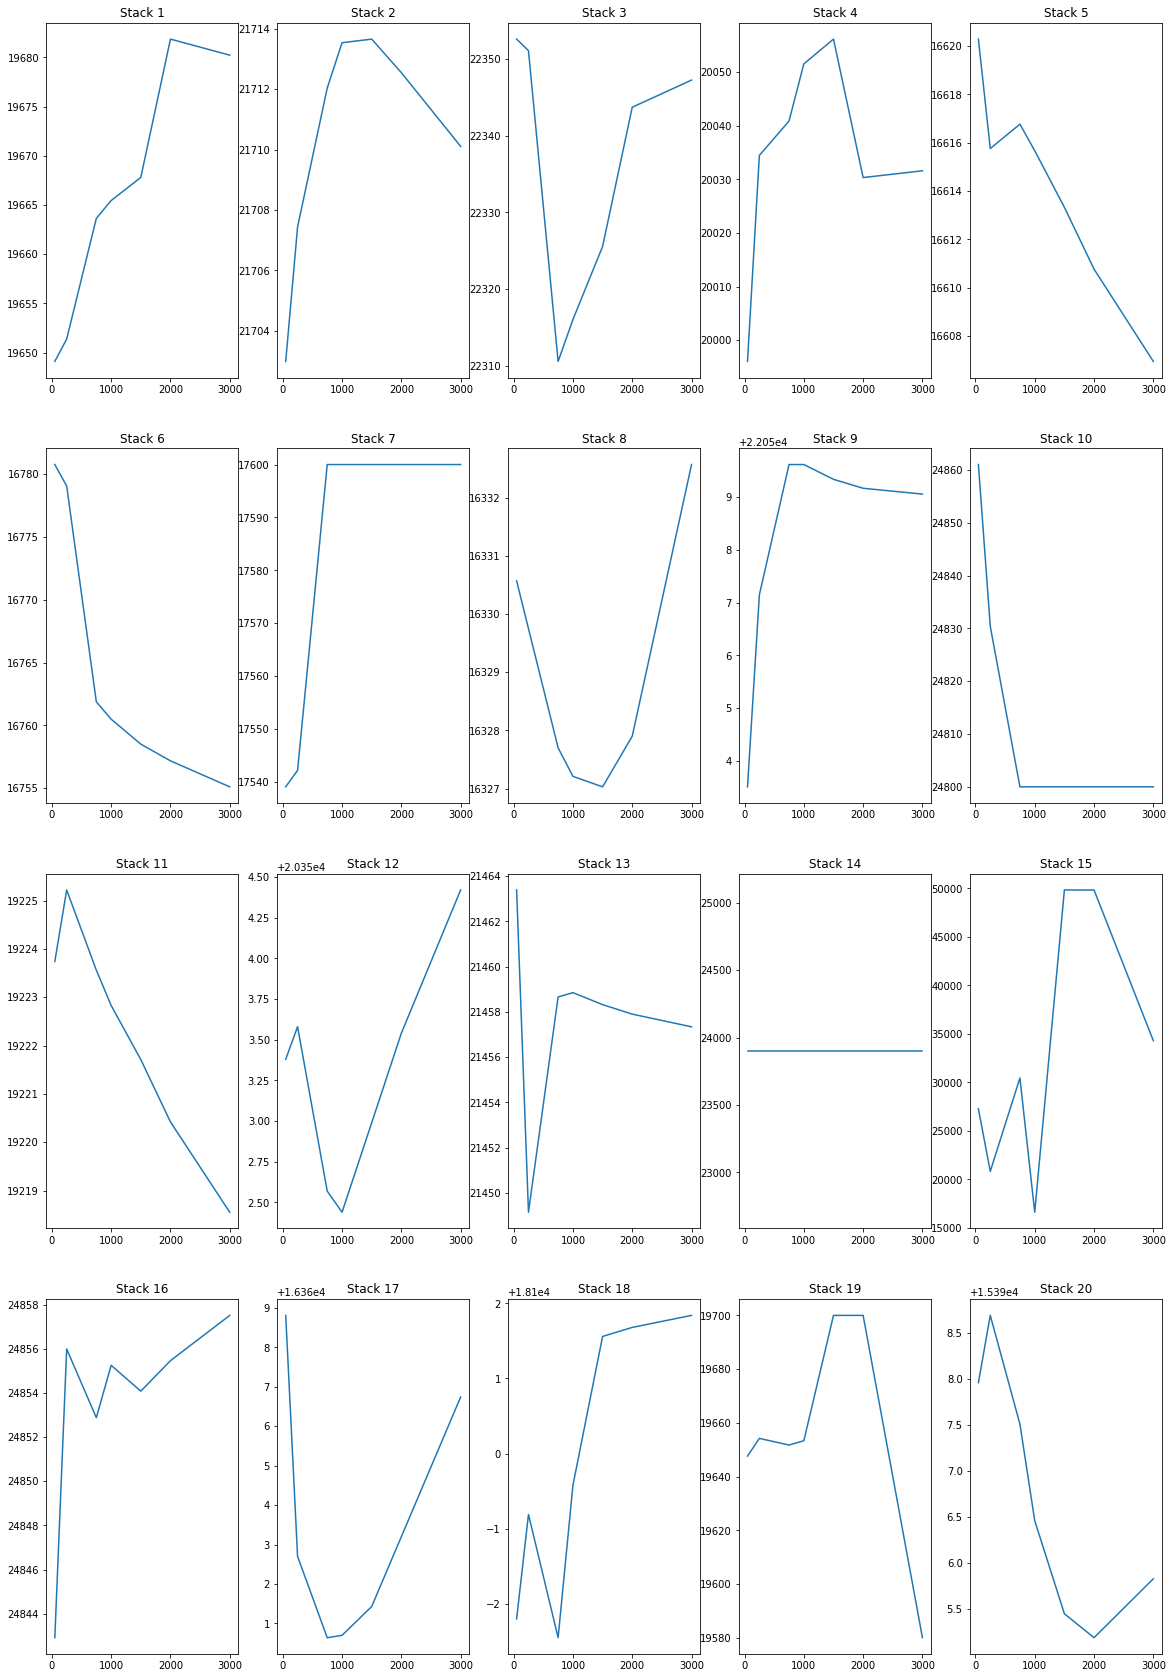

In [3]:
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(20,30)
for stack in all_metrics.keys():
    j = int(stack.split('stack')[-1])
    i = j-1
    stack_metrics = np.array(all_metrics[stack])
    order=stack_metrics[:,0].argsort()
    metrics_T = stack_metrics[order].T

    # print(metrics_T)

    bfactors = metrics_T[0]
#     print(bfactors)

    defocus = metrics_T[1]
#     print(defocus)

    scores = metrics_T[2]
#     print(scores)

    fit = metrics_T[3]
#     print(fit)
    r = i//5
    c = i%5
    axes[r, c].plot(bfactors, defocus)
    axes[r, c].set_title('Stack {}'.format(j))
    # Fine-tune figure; hide x ticks for tostack = 'stack16'p plots and y ticks for right plots

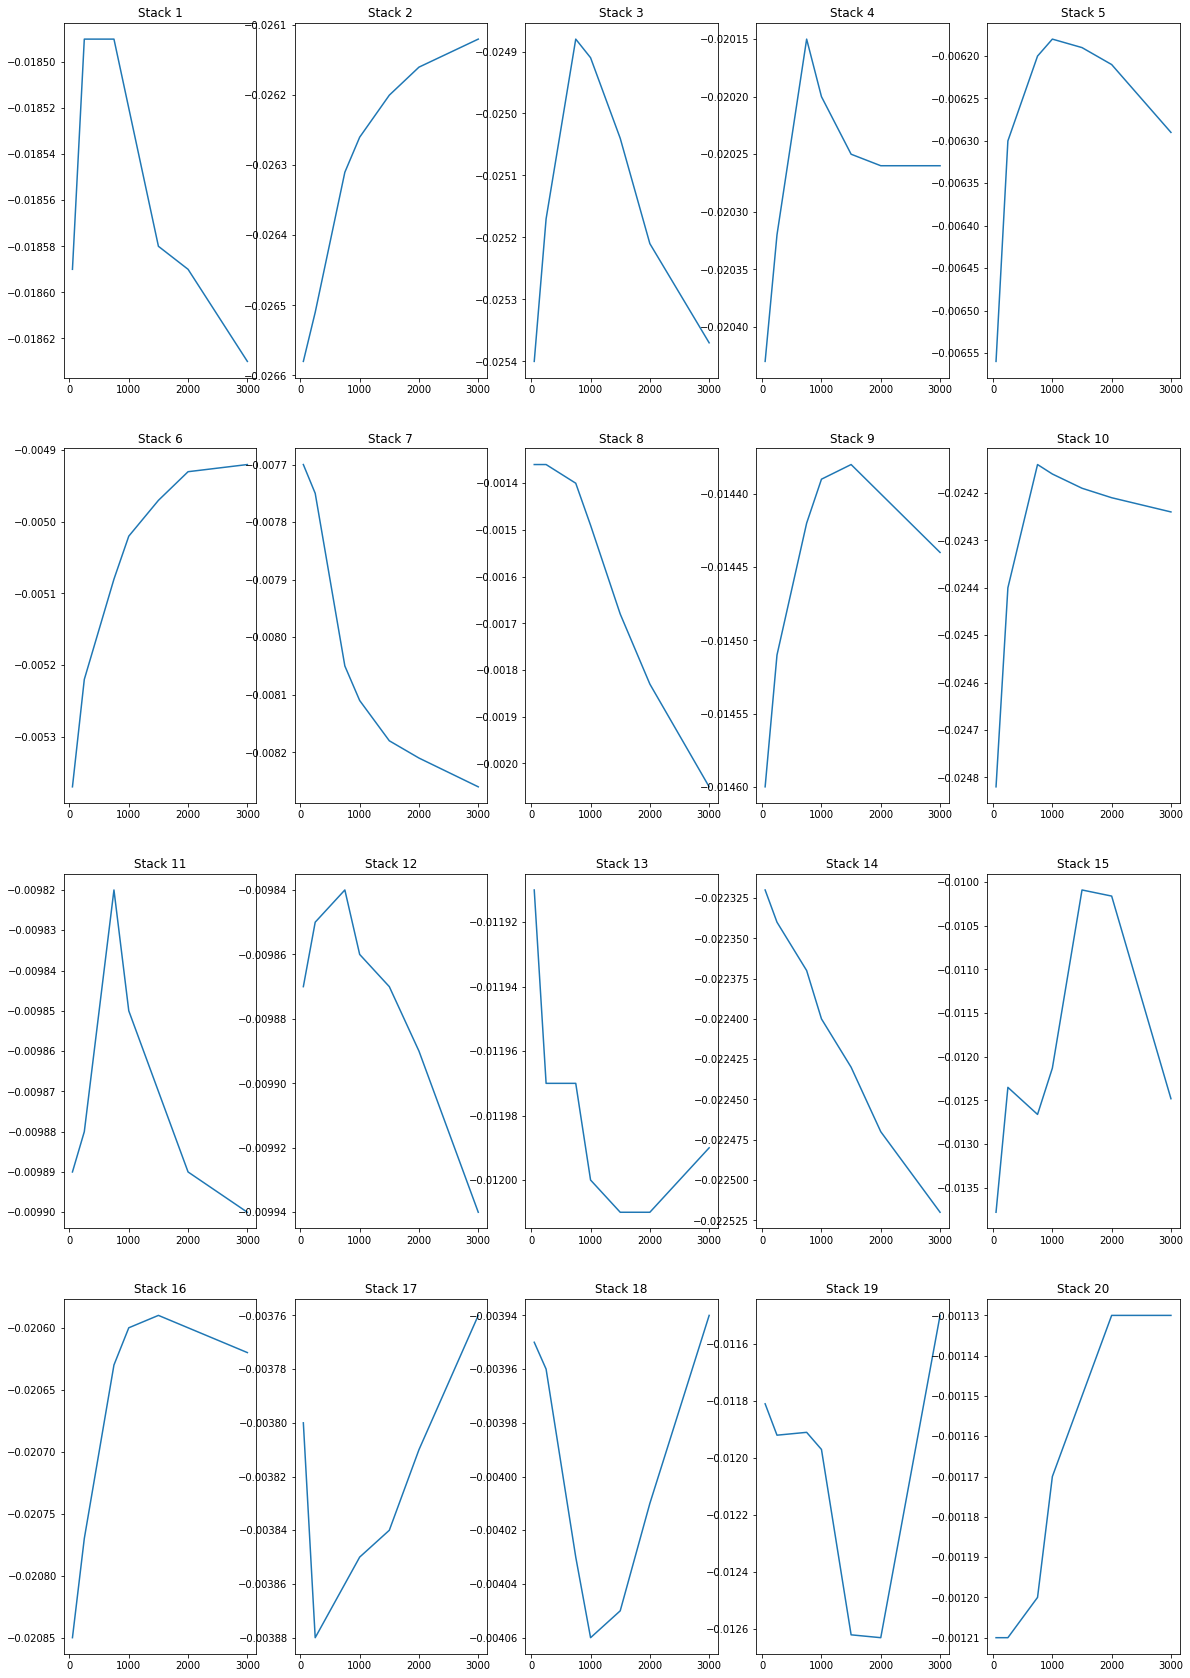

In [4]:
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(20,30)
for stack in all_metrics.keys():
    j = int(stack.split('stack')[-1])
    i = j-1
    stack_metrics = np.array(all_metrics[stack])
    order=stack_metrics[:,0].argsort()
    metrics_T = stack_metrics[order].T

    # print(metrics_T)

    bfactors = metrics_T[0]
#     print(bfactors)

    defocus = metrics_T[1]
#     print(defocus)

    scores = metrics_T[2]
#     print(scores)

    fit = metrics_T[3]
#     print(fit)
    r = i//5
    c = i%5
    axes[r, c].plot(bfactors, scores)
    axes[r, c].set_title('Stack {}'.format(j))
    # Fine-tune figure; hide x ticks for tostack = 'stack16'p plots and y ticks for right plots

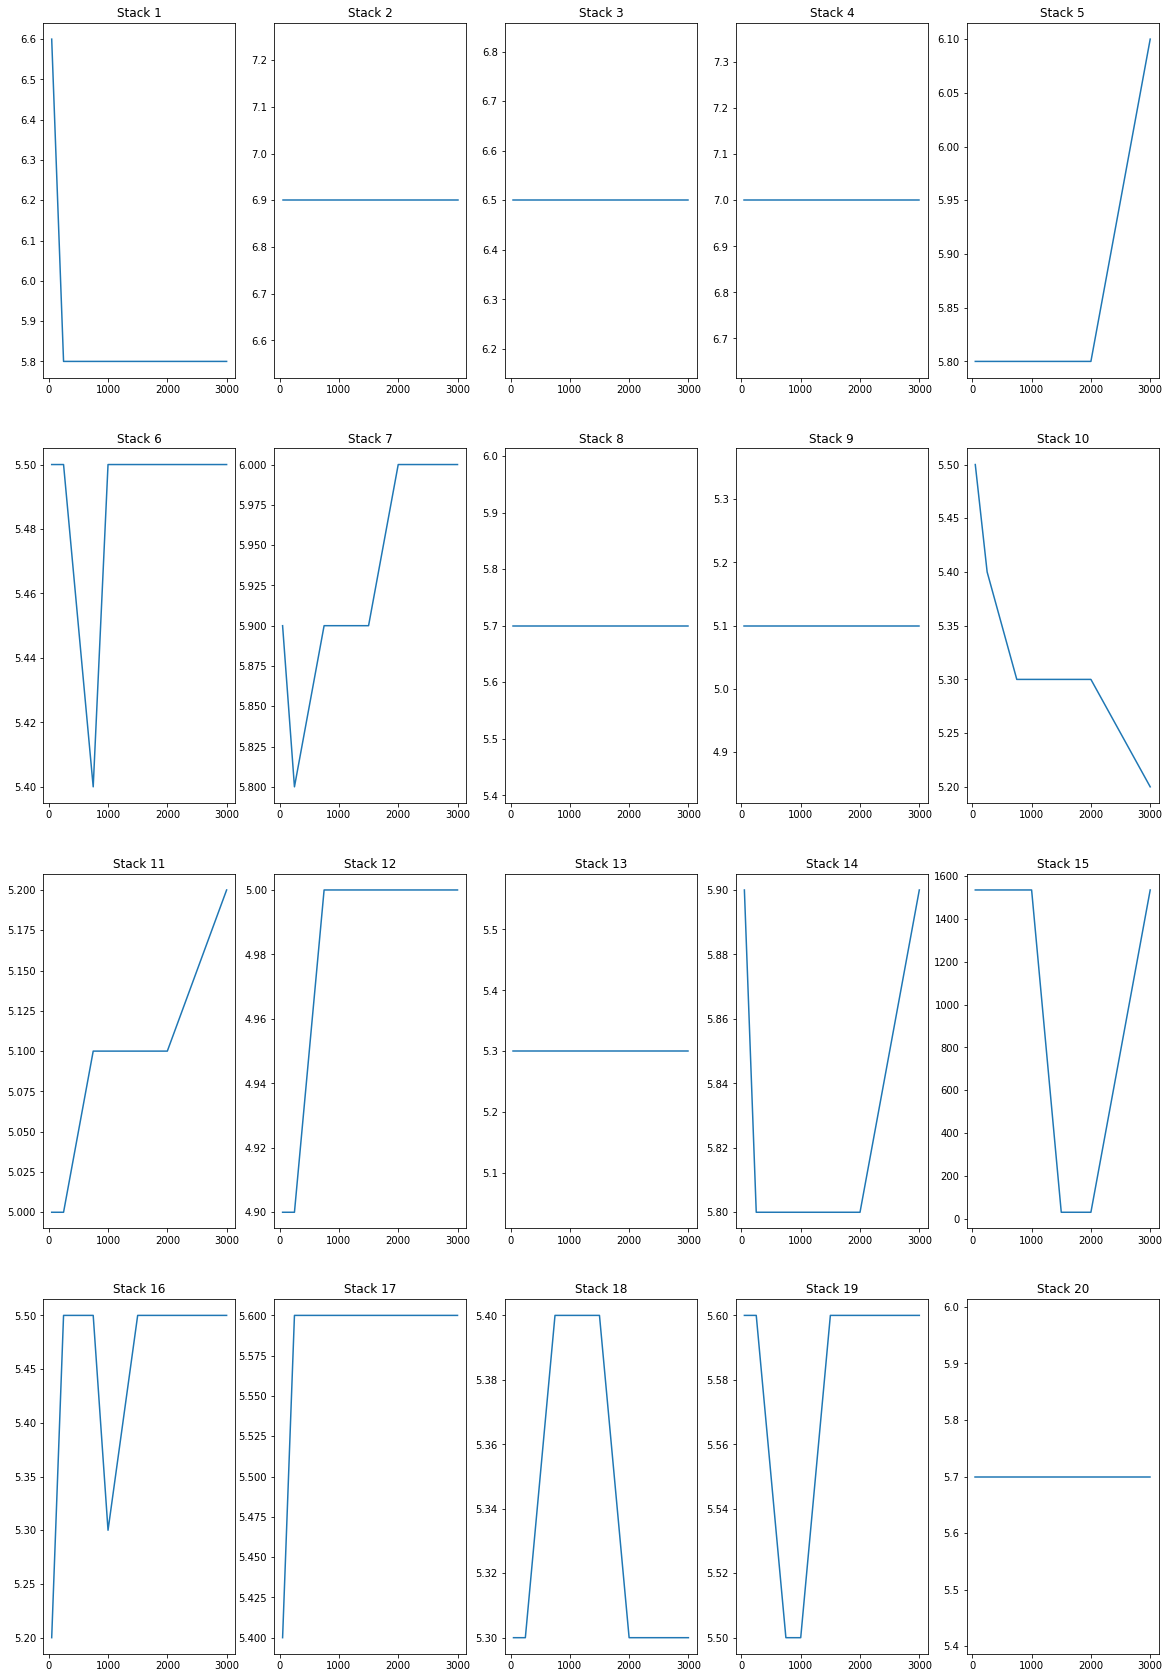

In [5]:
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(20,30)
for stack in all_metrics.keys():
    j = int(stack.split('stack')[-1])
    i = j-1
    stack_metrics = np.array(all_metrics[stack])
    order=stack_metrics[:,0].argsort()
    metrics_T = stack_metrics[order].T

    # print(metrics_T)

    bfactors = metrics_T[0]
#     print(bfactors)

    defocus = metrics_T[1]
#     print(defocus)

    scores = metrics_T[2]
#     print(scores)

    fit = metrics_T[3]
#     print(fit)
    r = i//5
    c = i%5
    axes[r, c].plot(bfactors, fit)
    axes[r, c].set_title('Stack {}'.format(j))
    # Fine-tune figure; hide x ticks for tostack = 'stack16'p plots and y ticks for right plots